In [4]:
import sys
sys.path.insert(0, "../python")

from ionization import ionization
from ionization import adk
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [12]:
# Test intensity_func
def f(E, t):
    return ionization.gaussian_field(E, t, 3*10**-1, 100).real

I = np.arange(0, 5, .005)
t = np.arange(-200, 200, 1)

g = adk.intensity_func(13.5984, I, t, f, 1)

# Test multidimensional input to ionization fraction
tau = 100
f = 3*10**-1

def ionization_plot(EI, I, t, f, tau, Z, chirp=0):
    IN = np.size(I)
    fld = np.zeros(IN)
    for x in range(0, IN):
        Efld = abs(ionization.gaussian_field(I[x], t, f, tau).real)
        fld[x] = adk.ionization_frac(EI, Efld, t, Z, 0, 0, False)
    return fld

H = ionization_plot(13.5984, I, t, f, tau, 1)
gc = interp1d(H, I)

In [15]:
# Comparison to ensure these are doing the exact same thing
frac = 1
print(g(frac))
print(gc(frac))

4.995
4.995


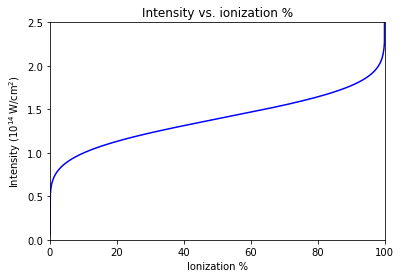

In [21]:
frac = np.arange(0, 1.001, 0.001)

plt.plot(frac*100, g(frac), 'b-')
plt.xlabel('Ionization %')
plt.ylabel('Intensity ($10^{14}\,\mathrm{W/cm}^2$)')
plt.title('Intensity vs. ionization %')
plt.xlim([0, 100])
plt.ylim([0, 2.5])
plt.show()